In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Loading the dataset
data = pd.read_csv('Crop_stage.csv')

In [3]:
# Display the first few rows of the dataframe
print(data.head())

    State District Name Market Name       Commodity Variety        Date  Temp  \
0  Kerala        Kannur      Kannur  Banana - Green   Other  01-01-2021  26.8   
1  Kerala        Kannur      Kannur  Banana - Green   Other  02-01-2021  25.9   
2  Kerala        Kannur      Kannur  Banana - Green   Other  03-01-2021  26.6   
3  Kerala        Kannur      Kannur  Banana - Green   Other  04-01-2021  27.0   
4  Kerala        Kannur      Kannur  Banana - Green   Other  05-01-2021  27.6   

   TempMax  TempMin  Humidity  ...  SolarRadiation  Crop stage growth  \
0     31.0     24.9      75.1  ...           223.7   Vegetative stage   
1     32.0     23.9      75.1  ...           240.6   Vegetative stage   
2     32.0     25.0      79.1  ...           213.5   Vegetative stage   
3     31.1     25.0      82.7  ...           180.1   Vegetative stage   
4     32.0     25.0      81.5  ...           203.2   Vegetative stage   

   Soil Moisture       Soil type   Soil ph    N   P   K  Water Requirement

In [4]:
# Get basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              730 non-null    object 
 1   District Name      730 non-null    object 
 2   Market Name        730 non-null    object 
 3   Commodity          730 non-null    object 
 4   Variety            730 non-null    object 
 5    Date              730 non-null    object 
 6   Temp               730 non-null    float64
 7   TempMax            730 non-null    float64
 8   TempMin            730 non-null    float64
 9   Humidity           730 non-null    float64
 10  Precipitation      730 non-null    float64
 11  Windspeed          730 non-null    float64
 12  SolarRadiation     730 non-null    float64
 13  Crop stage growth  730 non-null    object 
 14  Soil Moisture      730 non-null    float64
 15  Soil type          730 non-null    object 
 16  Soil ph            730 non

In [5]:
# Get summary statistics
print(data.describe())

             Temp     TempMax     TempMin    Humidity  Precipitation  \
count  730.000000  730.000000  730.000000  730.000000     730.000000   
mean    27.003973   31.106164   24.957123   80.788219       8.817671   
std      1.197058    1.396086    1.029728    6.897468      15.581395   
min     23.600000   26.000000   20.700000   46.900000       0.000000   
25%     26.200000   30.200000   24.400000   76.525000       0.200000   
50%     26.900000   31.000000   25.000000   81.500000       2.900000   
75%     27.800000   32.000000   25.600000   85.800000       9.475000   
max     30.300000   34.500000   27.900000   94.700000     159.300000   

        Windspeed  SolarRadiation  Soil Moisture     Soil ph           N  \
count  730.000000      730.000000     730.000000  730.000000  730.000000   
mean    15.113699      214.863288     145.391421    5.983893  100.224658   
std      4.494158       66.857739      52.681349    0.099738   11.097347   
min      6.100000       11.700000      81.70000

In [6]:
# Extract unique values for categorical columns
state_unique = data['State'].unique()
district_unique = data['District Name'].unique()
market_unique = data['Market Name'].unique()
commodity_unique = data['Commodity'].unique()
variety_unique = data['Variety'].unique()
crop_stage_unique = data['Crop stage growth'].unique()
soil_type_unique = data['Soil type'].unique()

# Print unique values
print(f'Unique States: {state_unique}')
print(f'Unique District Names: {district_unique}')
print(f'Unique Market Names: {market_unique}')
print(f'Unique Commodities: {commodity_unique}')
print(f'Unique Varieties: {variety_unique}')
print(f'Unique Crop Growth Stages: {crop_stage_unique}')
print(f'Unique Soil Types: {soil_type_unique}')

Unique States: ['Kerala']
Unique District Names: ['Kannur']
Unique Market Names: ['Kannur']
Unique Commodities: ['Banana - Green']
Unique Varieties: ['Other']
Unique Crop Growth Stages: ['Vegetative stage' 'Shooting stage' 'Establishment stage'
 'Development and harvesting stage']
Unique Soil Types: ['loamy to humid']


In [7]:
# Check for missing values
print(data.isnull().sum())

State                0
District Name        0
Market Name          0
Commodity            0
Variety              0
 Date                0
Temp                 0
TempMax              0
TempMin              0
Humidity             0
Precipitation        0
Windspeed            0
SolarRadiation       0
Crop stage growth    0
Soil Moisture        0
Soil type            0
Soil ph              0
N                    0
P                    0
K                    0
Water Requirement    0
Crop Yield           0
dtype: int64


In [8]:
# Drop the 'Temp' column
data = data.drop(columns=['Temp'])

In [9]:
# Verify if the column is dropped
print(data.columns)

Index(['State', 'District Name', 'Market Name', 'Commodity', 'Variety',
       ' Date', 'TempMax', 'TempMin', 'Humidity', 'Precipitation', 'Windspeed',
       'SolarRadiation', 'Crop stage growth', 'Soil Moisture', 'Soil type',
       'Soil ph', 'N', 'P', 'K', 'Water Requirement', 'Crop Yield'],
      dtype='object')


In [10]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [11]:
# Strip leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', errors='coerce')

In [12]:
# Extract year, month, and day
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Verify the changes
print(data[['Date', 'Year', 'Month', 'Day']].head())

        Date  Year  Month  Day
0 2021-01-01  2021      1    1
1 2021-01-02  2021      1    2
2 2021-01-03  2021      1    3
3 2021-01-04  2021      1    4
4 2021-01-05  2021      1    5


In [13]:
# Check unique years to see if 2023 is present
unique_years = data['Year'].unique()
print(f"Unique years in the dataset: {unique_years}")

# Check for any incorrect dates
incorrect_dates = data[data['Year'] == 2023]
print(f"Incorrect dates:\n{incorrect_dates}")

Unique years in the dataset: [2021 2022]
Incorrect dates:
Empty DataFrame
Columns: [State, District Name, Market Name, Commodity, Variety, Date, TempMax, TempMin, Humidity, Precipitation, Windspeed, SolarRadiation, Crop stage growth, Soil Moisture, Soil type, Soil ph, N, P, K, Water Requirement, Crop Yield, Year, Month, Day]
Index: []

[0 rows x 24 columns]


In [14]:
# Ensure there are no rows with incorrect dates
data = data[data['Year'] <= 2022]

In [15]:
# Remove rows with incorrect dates (if necessary)
data = data[data['Year'] <= 2022]

In [16]:
monthly_yield = data.groupby('Month')['Crop Yield'].mean()
yearly_yield = data.groupby('Year')['Crop Yield'].mean()

In [17]:
crop_stage_by_month = data.groupby(['Month', 'Crop stage growth']).size().unstack()
print(crop_stage_by_month)

Crop stage growth  Development and harvesting stage  Establishment stage  \
Month                                                                      
1                                              14.0                 17.0   
2                                               NaN                 28.0   
3                                               NaN                 25.0   
4                                               NaN                  NaN   
5                                               NaN                 31.0   
6                                               NaN                 30.0   
7                                               NaN                  9.0   
8                                               NaN                  NaN   
9                                              21.0                  NaN   
10                                              NaN                 31.0   
11                                              NaN                 30.0   
12          

In [18]:
crop_stage_by_year = data.groupby(['Year', 'Crop stage growth']).size().unstack()
print(crop_stage_by_year)

Crop stage growth  Development and harvesting stage  Establishment stage  \
Year                                                                       
2021                                              7                   70   
2022                                             35                  140   

Crop stage growth  Shooting stage  Vegetative stage  
Year                                                 
2021                          142               146  
2022                           84               106  


In [19]:
monthly_yield = data.groupby('Month')['Crop Yield'].mean()
print(monthly_yield)

Month
1     8.594194
2     8.683513
3     8.591471
4     8.735925
5     8.540428
6     8.704788
7     8.611125
8     8.591471
9     8.735925
10    8.540428
11    8.704788
12    8.611125
Name: Crop Yield, dtype: float64


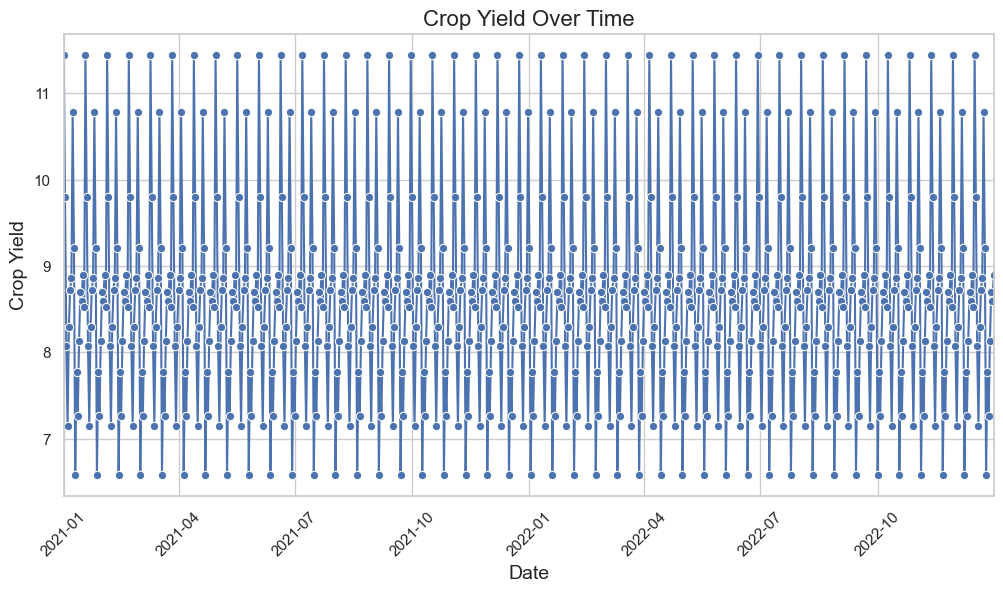

In [20]:
# Plot Crop Yield over time
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Crop Yield', data=data, marker='o', color='b')
plt.title('Crop Yield Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Crop Yield', fontsize=14)
plt.xticks(rotation=45)
plt.xlim(pd.Timestamp('2021-01-01'), pd.Timestamp('2022-12-31'))  # Explicitly set x-axis limits
plt.show()

We calculate the average yield for each crop stage to identify which stages are most critical for maximizing yield and to optimize resource allocation. This helps us make better decisions to improve overall crop production.

In [21]:
crop_stage_distribution = data['Crop stage growth'].value_counts()
print(crop_stage_distribution)

Crop stage growth
Vegetative stage                    252
Shooting stage                      226
Establishment stage                 210
Development and harvesting stage     42
Name: count, dtype: int64


In [22]:
stage_yield = data.groupby('Crop stage growth')['Crop Yield'].mean()
print(stage_yield)

Crop stage growth
Development and harvesting stage    8.678730
Establishment stage                 8.626131
Shooting stage                      8.635020
Vegetative stage                    8.637416
Name: Crop Yield, dtype: float64


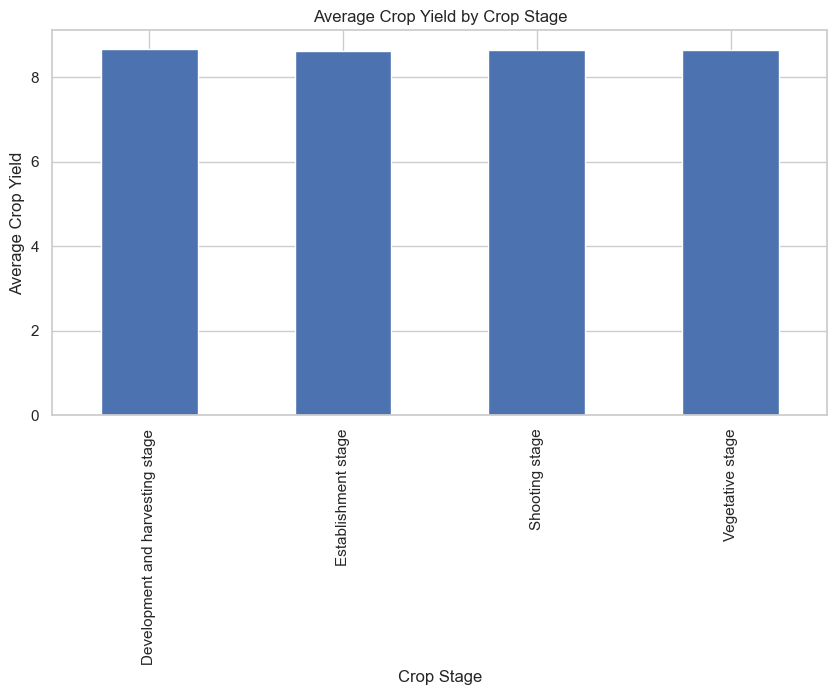

In [23]:
plt.figure(figsize=(10, 5))
stage_yield.plot(kind='bar')
plt.title('Average Crop Yield by Crop Stage')
plt.xlabel('Crop Stage')
plt.ylabel('Average Crop Yield')
plt.show()

In [24]:
print(data[['N', 'P', 'K']].describe())

                N           P           K
count  730.000000  730.000000  730.000000
mean   100.224658   82.075342   50.050685
std     11.097347    7.673807    3.361022
min     80.000000   70.000000   45.000000
25%     92.000000   75.000000   47.000000
50%    101.000000   81.000000   50.000000
75%    109.000000   88.000000   53.000000
max    120.000000   95.000000   55.000000


In [25]:
correlation = data[['N', 'P', 'K', 'Crop Yield']].corr()
print(correlation)

                   N         P         K  Crop Yield
N           1.000000 -0.051761  0.099545    0.032423
P          -0.051761  1.000000  0.094202    0.017759
K           0.099545  0.094202  1.000000   -0.007507
Crop Yield  0.032423  0.017759 -0.007507    1.000000


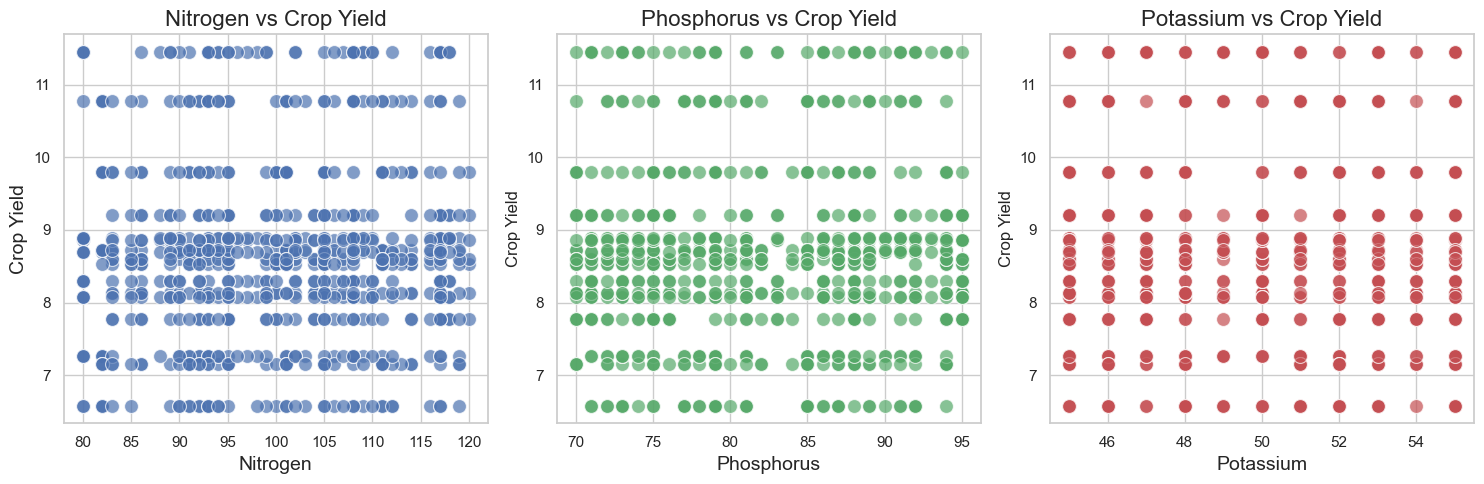

In [26]:
# Set style and color palette
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(15, 5))

# Plotting scatter plots with enhanced aesthetics
plt.subplot(1, 3, 1)
sns.scatterplot(x='N', y='Crop Yield', data=data, color='b', edgecolor='w', s=100, alpha=0.7)
plt.title('Nitrogen vs Crop Yield', fontsize=16)
plt.xlabel('Nitrogen', fontsize=14)
plt.ylabel('Crop Yield', fontsize=14)

plt.subplot(1, 3, 2)
sns.scatterplot(x='P', y='Crop Yield', data=data, color='g', edgecolor='w', s=100, alpha=0.7)
plt.title('Phosphorus vs Crop Yield', fontsize=16)
plt.xlabel('Phosphorus', fontsize=14)

plt.subplot(1, 3, 3)
sns.scatterplot(x='K', y='Crop Yield', data=data, color='r', edgecolor='w', s=100, alpha=0.7)
plt.title('Potassium vs Crop Yield', fontsize=16)
plt.xlabel('Potassium', fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

In [27]:
print(data['Water Requirement'].describe())

count    730.000000
mean       7.016575
std        4.546484
min        0.100000
25%        4.500000
50%        7.015000
75%        9.500000
max       21.500000
Name: Water Requirement, dtype: float64


In [28]:
correlation = data[['Water Requirement', 'Crop Yield']].corr()
print(correlation)

                   Water Requirement  Crop Yield
Water Requirement            1.00000    -0.01199
Crop Yield                  -0.01199     1.00000


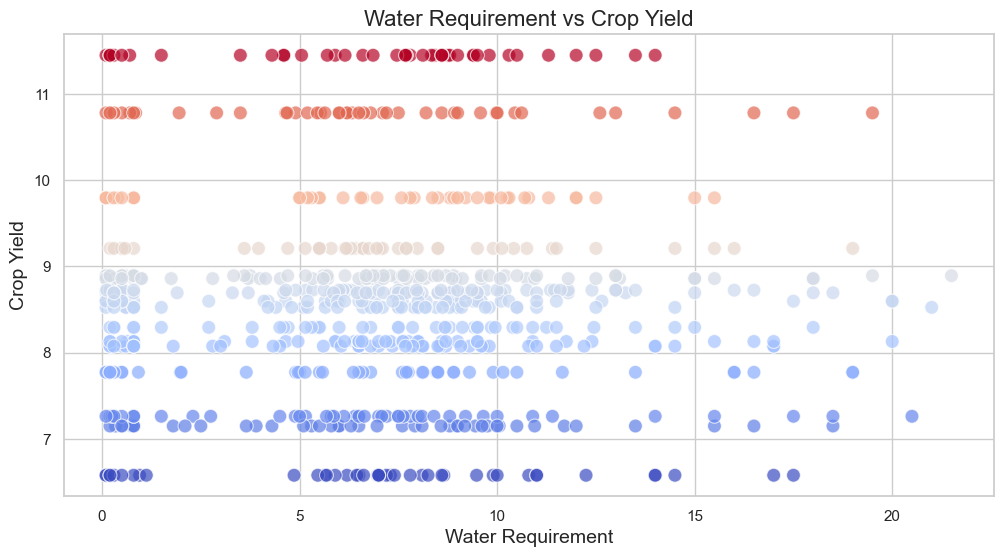

In [29]:
# Set style and color palette
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plotting the scatter plot with enhanced aesthetics
sns.scatterplot(x='Water Requirement', y='Crop Yield', data=data, 
                color='purple', edgecolor='w', s=100, alpha=0.7, 
                marker='o', hue='Crop Yield', palette='coolwarm', legend=None)

# Adding title and labels
plt.title('Water Requirement vs Crop Yield', fontsize=16)
plt.xlabel('Water Requirement', fontsize=14)
plt.ylabel('Crop Yield', fontsize=14)

# Adding a grid for better readability
plt.grid(True)

# Display the plot
plt.show()

In [30]:
unique_states = data['State'].unique()
print(unique_states)

['Kerala']


In [31]:
state_yield = data.groupby('State')['Crop Yield'].mean()
print(state_yield)

State
Kerala    8.635805
Name: Crop Yield, dtype: float64


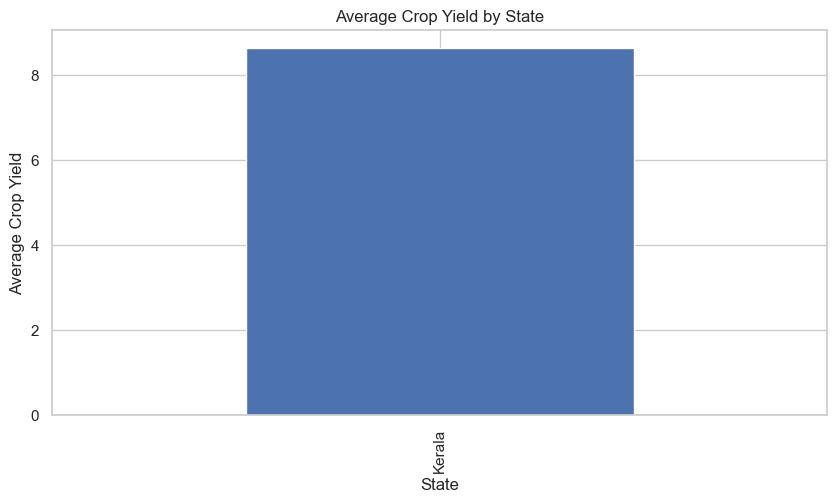

In [32]:
plt.figure(figsize=(10, 5))
state_yield.plot(kind='bar')
plt.title('Average Crop Yield by State')
plt.xlabel('State')
plt.ylabel('Average Crop Yield')
plt.show()

In [33]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

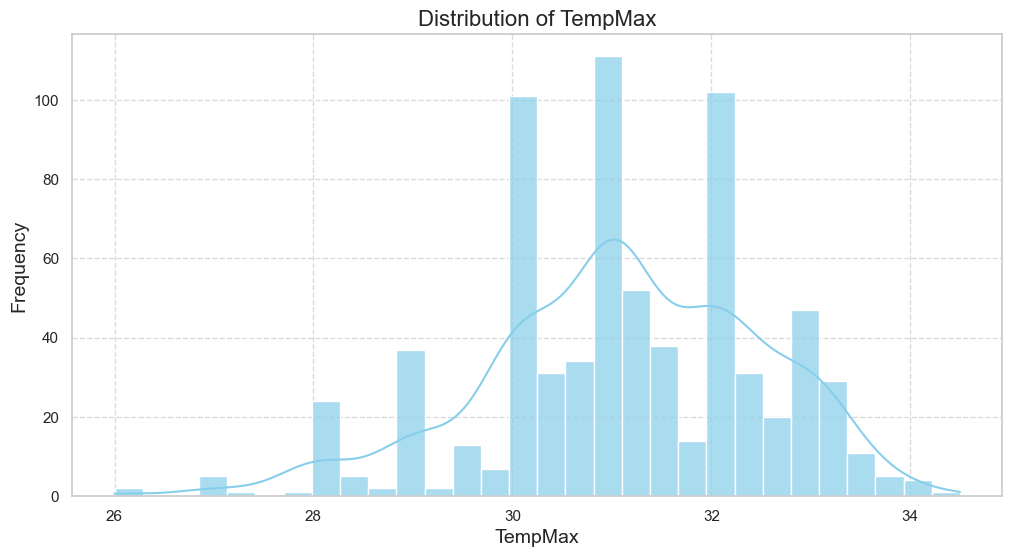

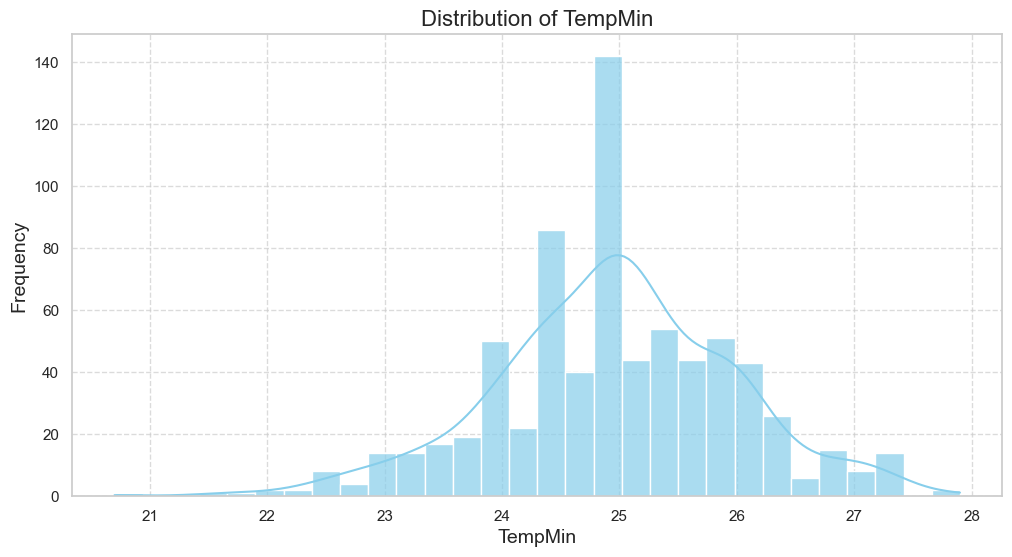

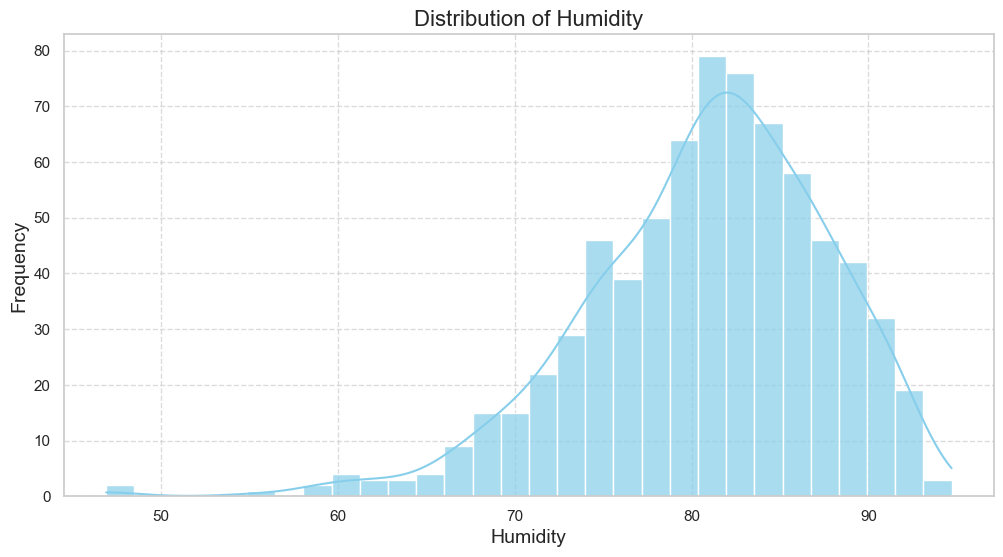

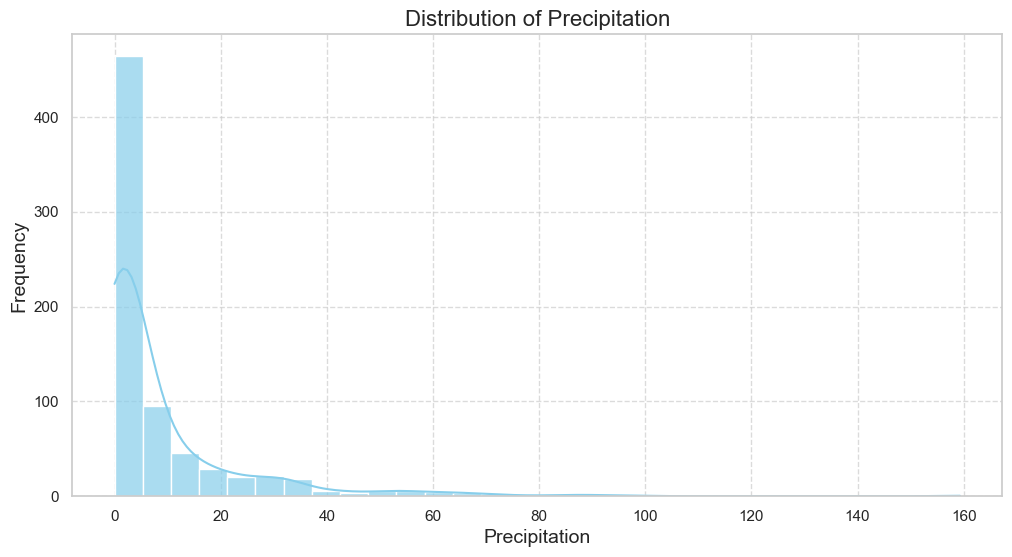

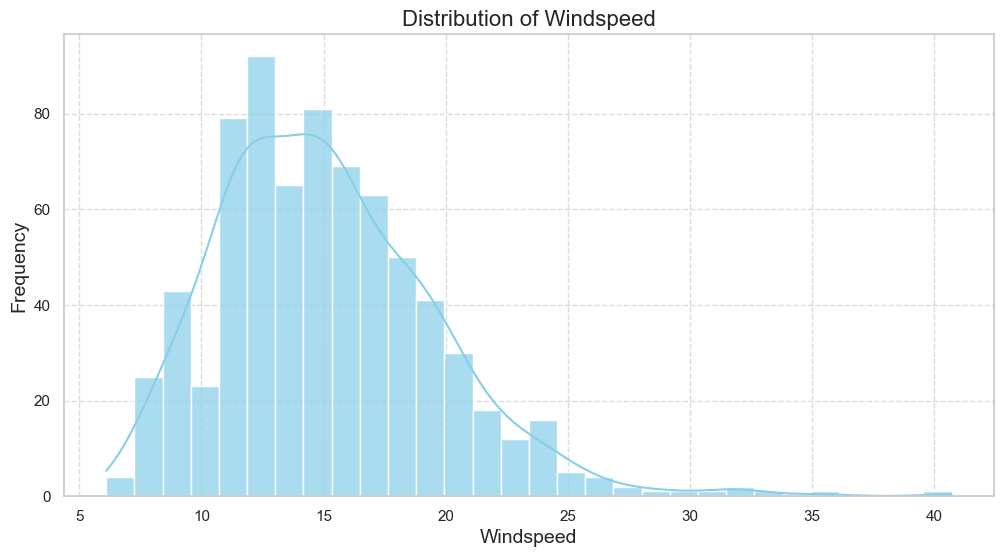

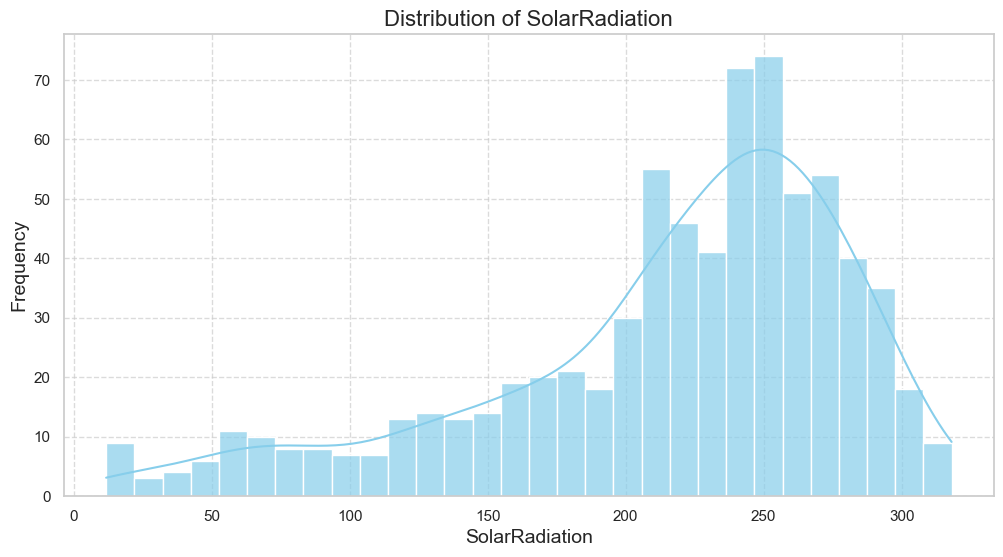

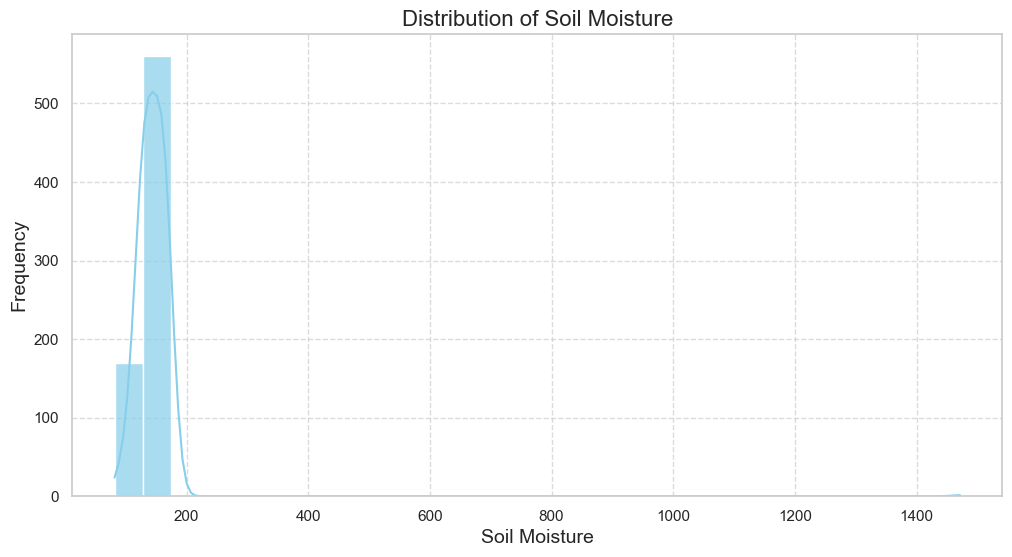

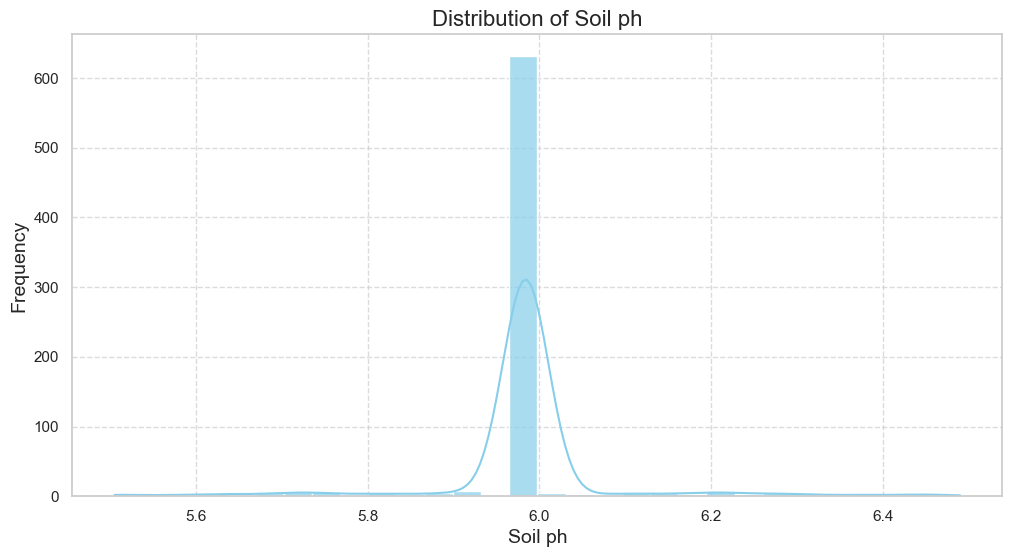

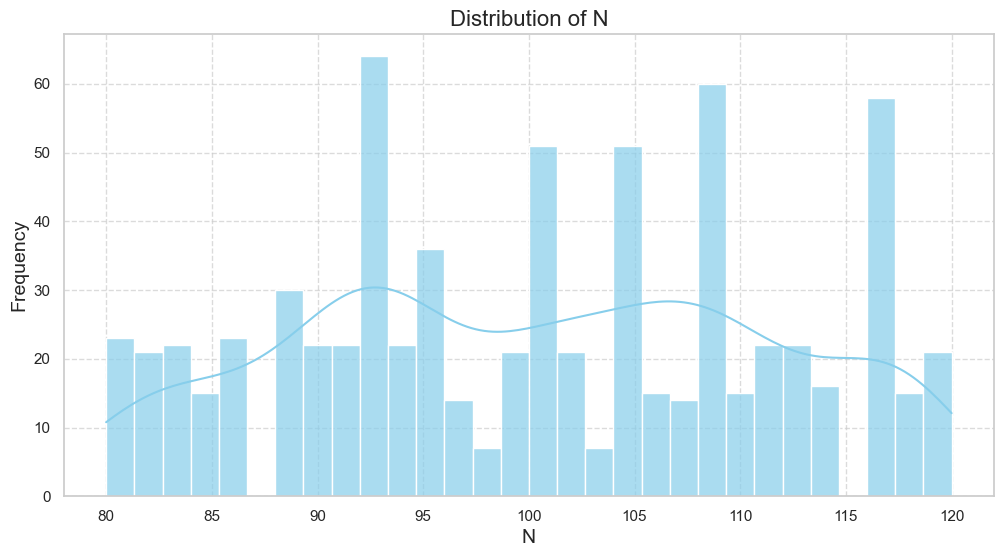

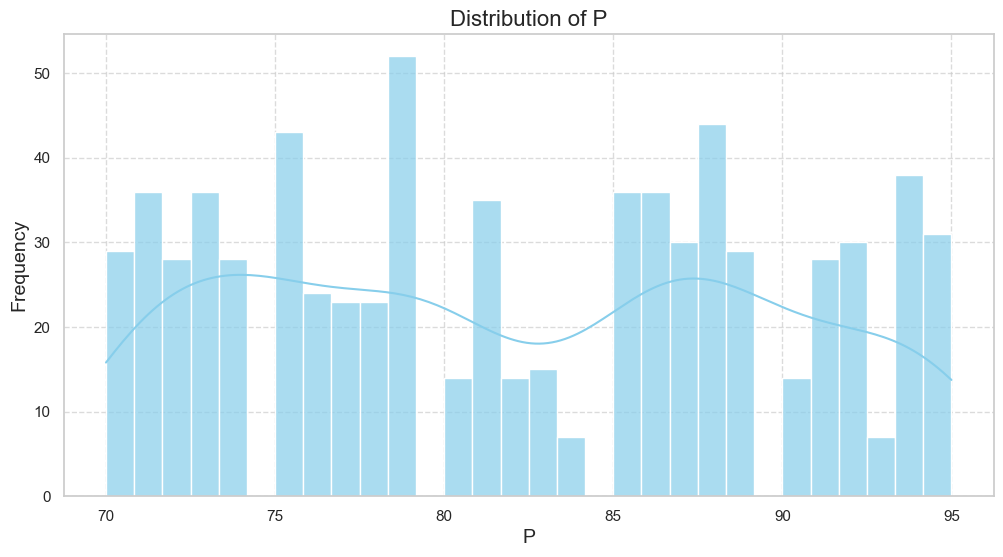

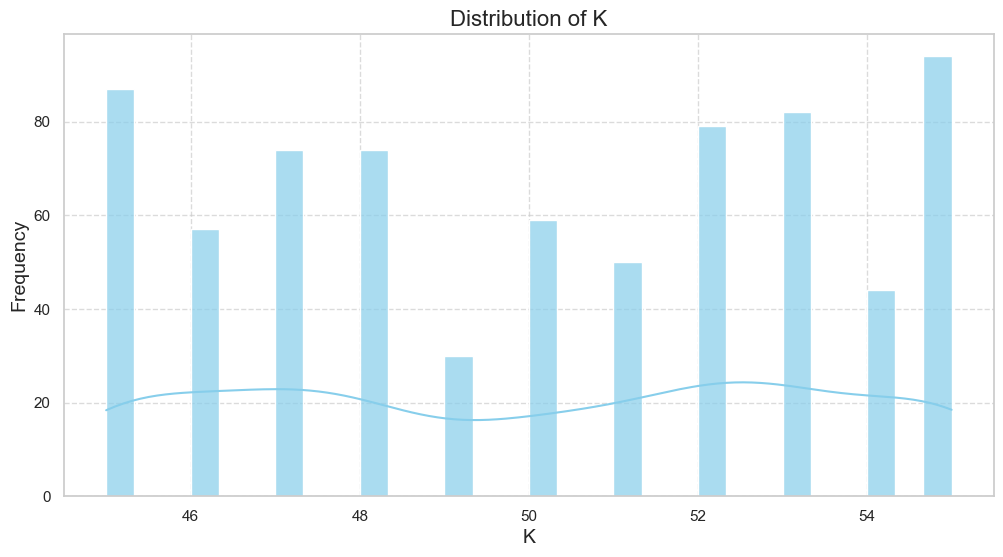

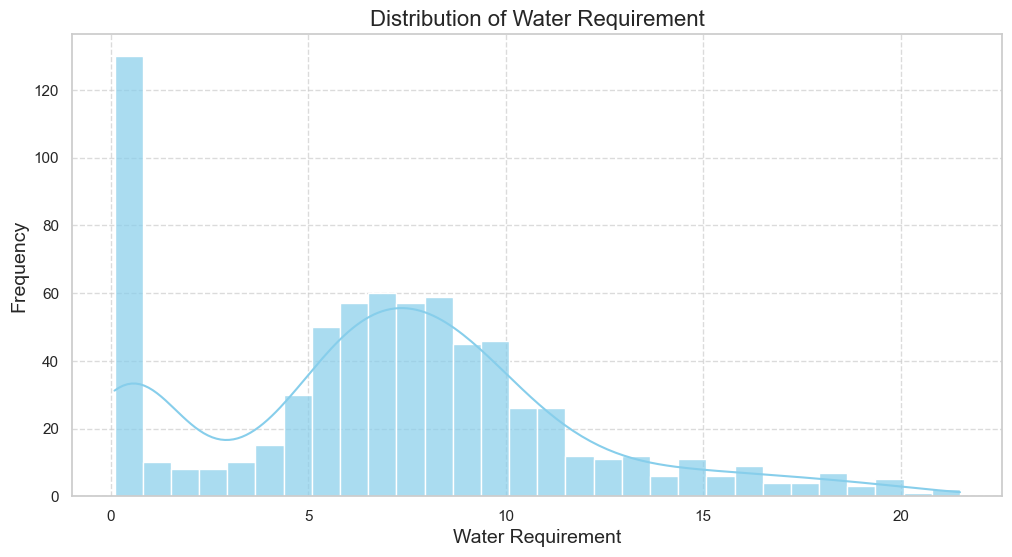

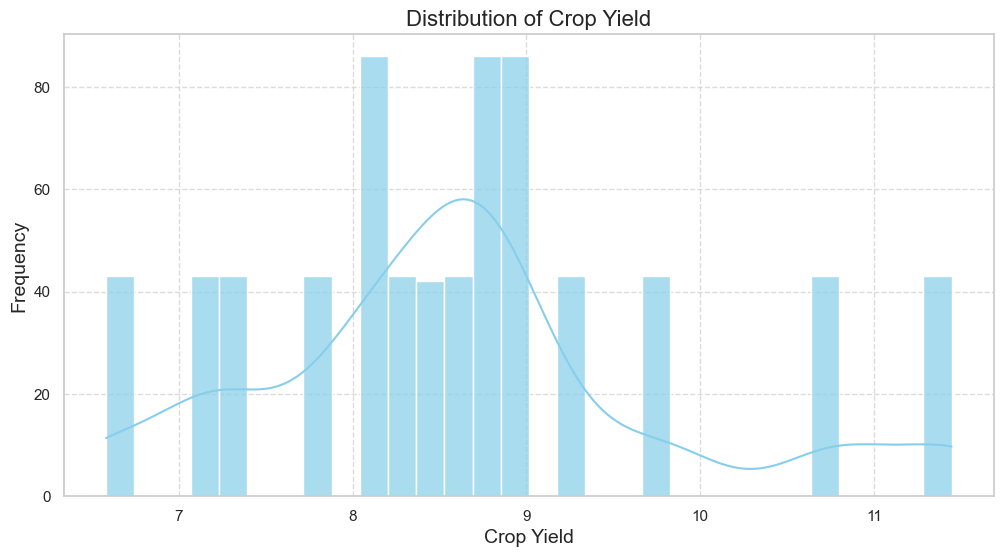

In [34]:
sns.set(style="whitegrid")
sns.set_palette("pastel")
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    
    # Plot histogram with KDE
    sns.histplot(data[column], kde=True, bins=30, color="skyblue", edgecolor="w", alpha=0.7)
    
    # Adding title and labels
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    
    # Adding a grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Display the plot
    plt.show()

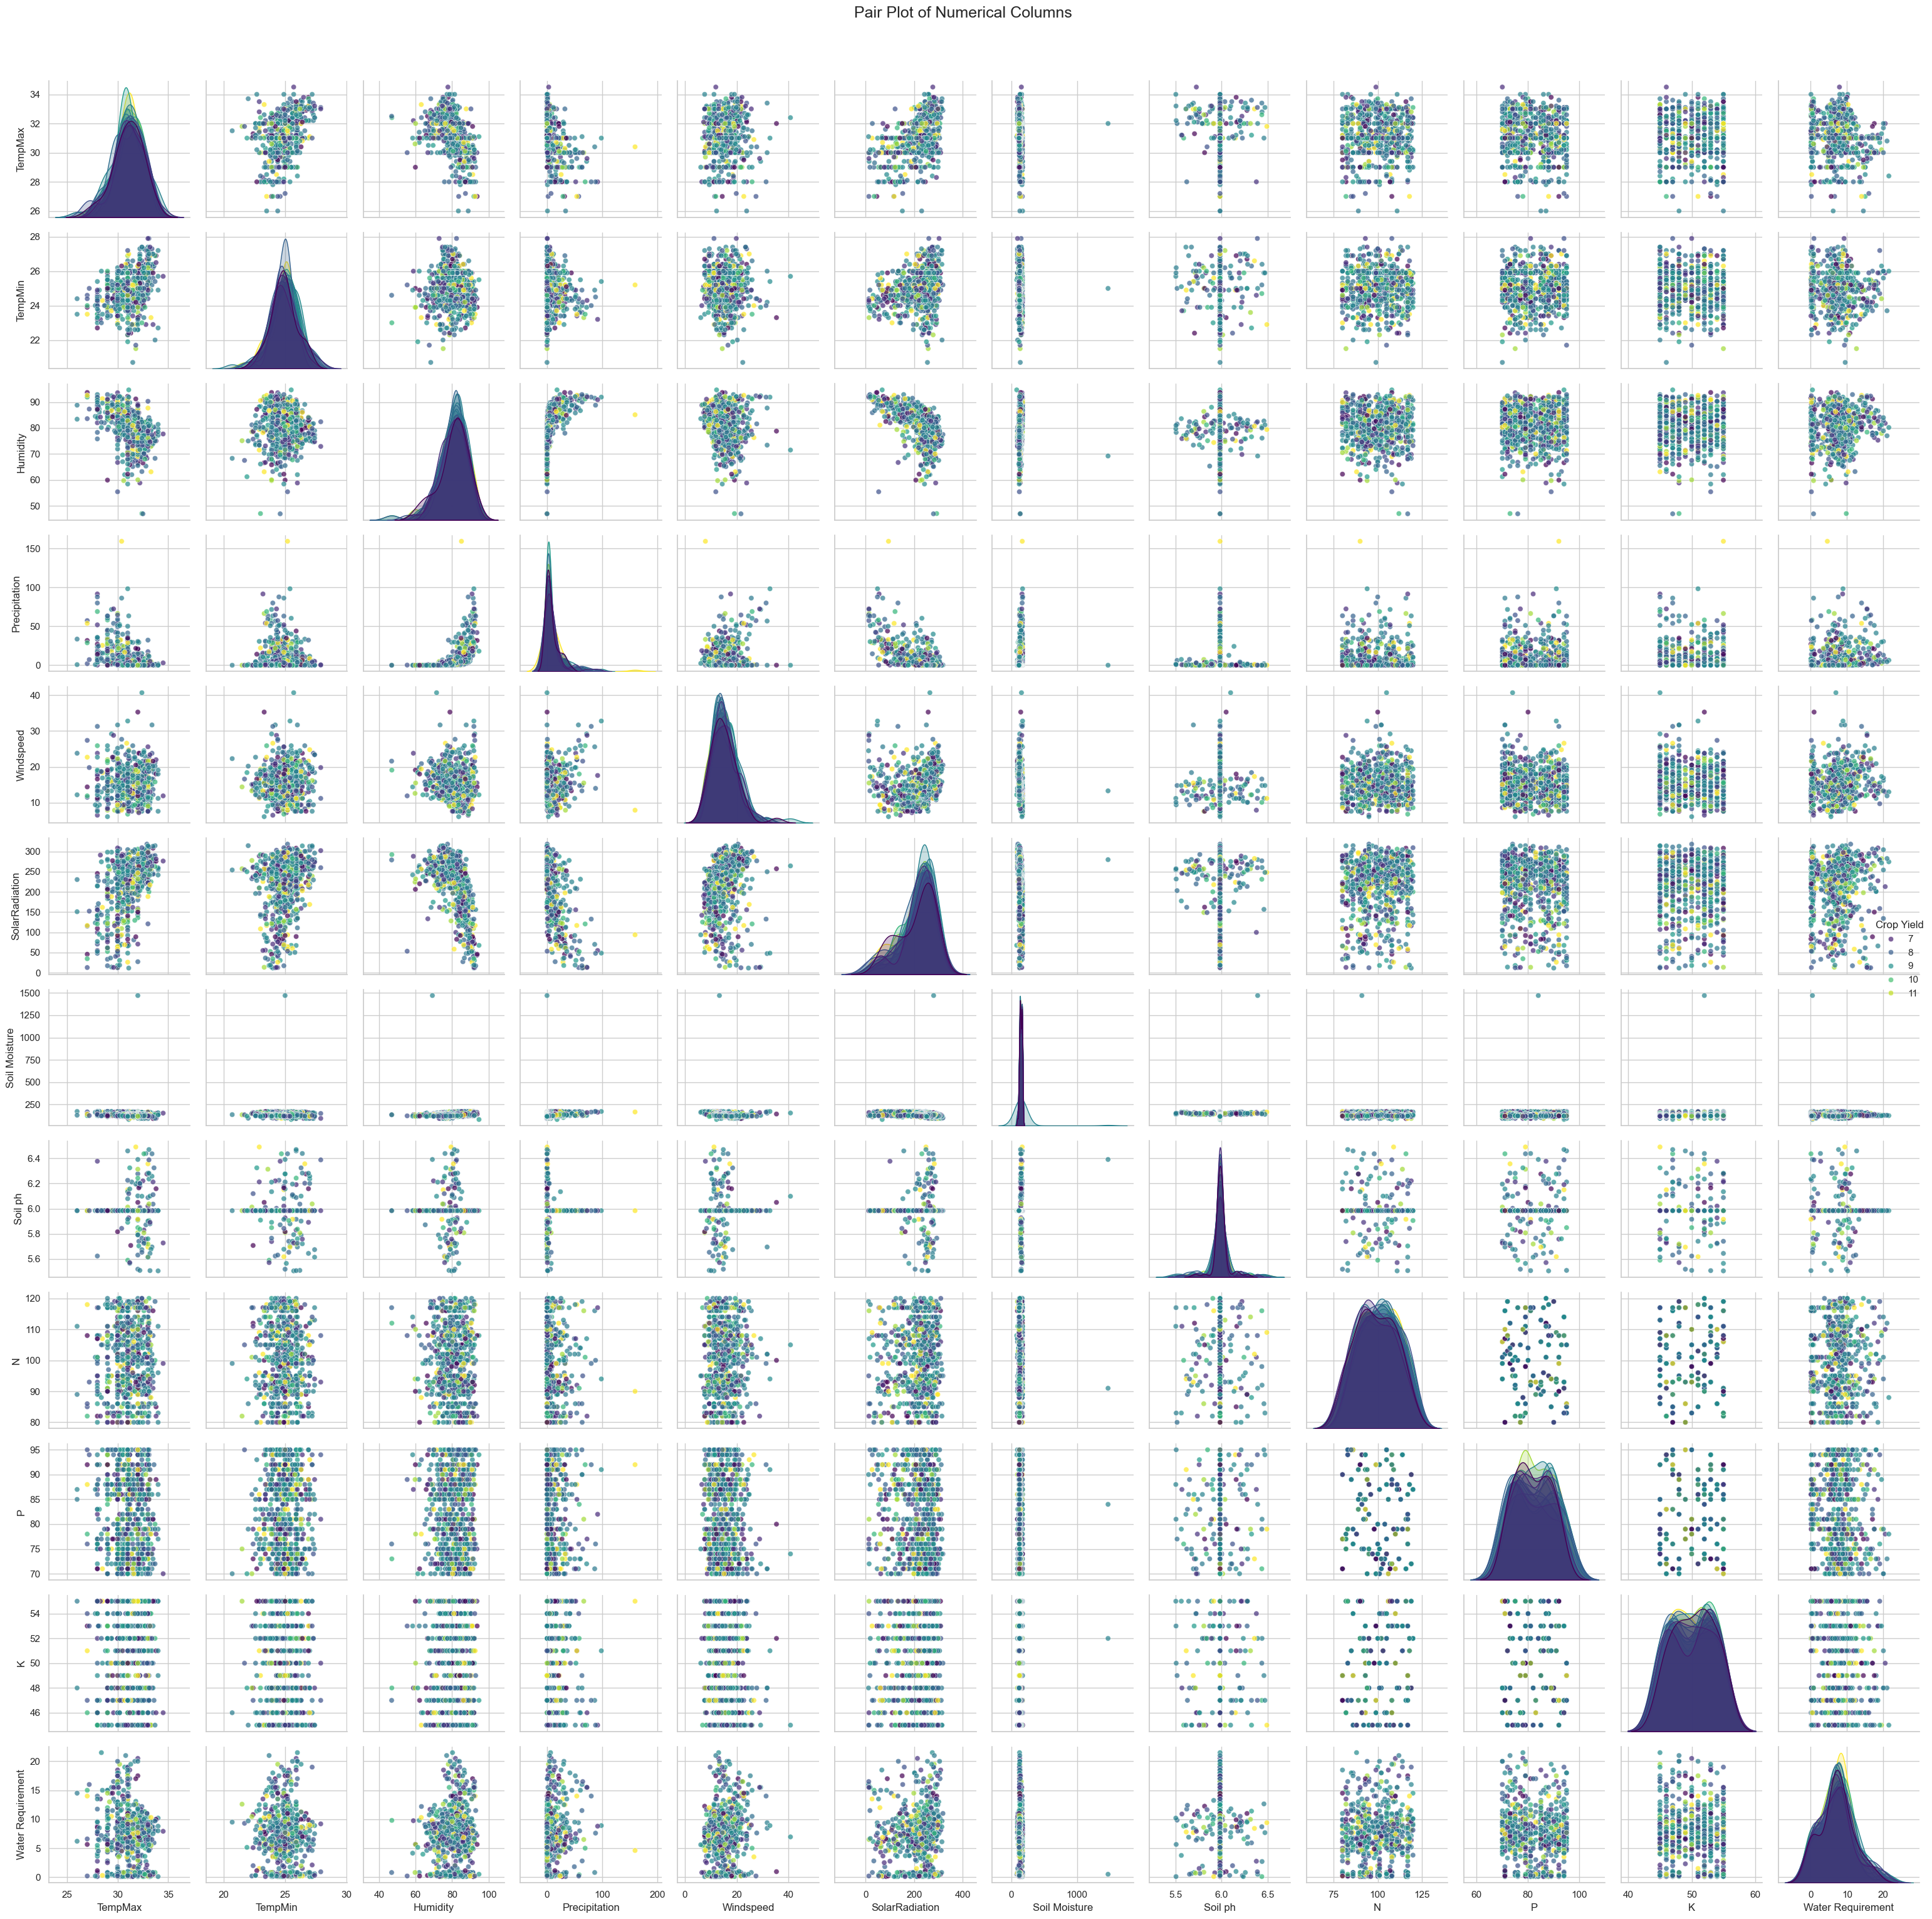

In [35]:
# Pair plot for numerical relationships
sns.set_theme(style="whitegrid")
# Create the pair plot with improved aesthetics
pair_plot = sns.pairplot(
    data[numerical_columns],
    diag_kind="kde",         # Use KDE plots on the diagonal for better density estimation
    hue="Crop Yield",        # Optional: Use a hue for visualizing the relationship with crop yield
    palette="viridis",       # Color palette for the plots
    markers="o",             # Marker style for scatter plots
    plot_kws={'alpha':0.7}   # Set transparency for scatter plots
)

# Set the title and adjust layout
pair_plot.fig.suptitle('Pair Plot of Numerical Columns', y=1.02, fontsize=18)
plt.tight_layout()

# Display the plot
plt.show()

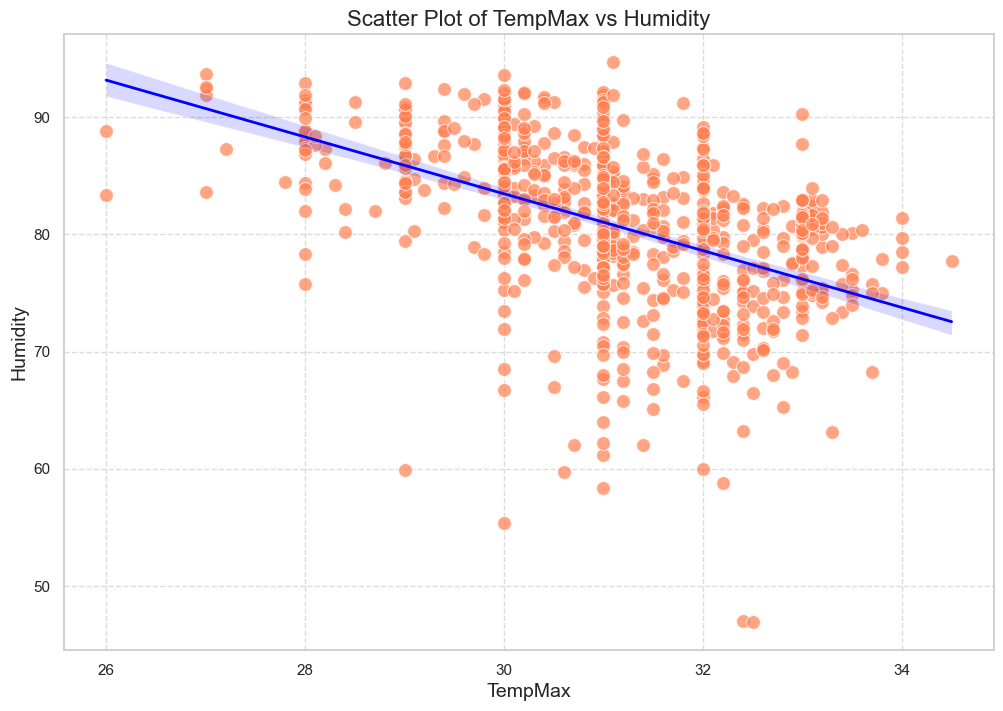

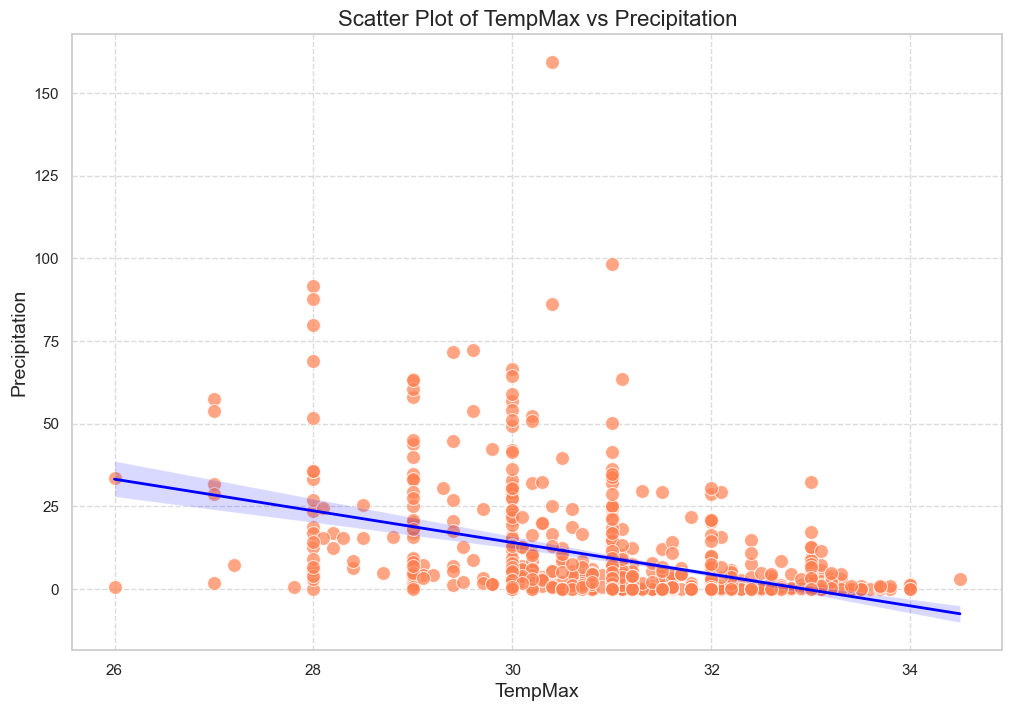

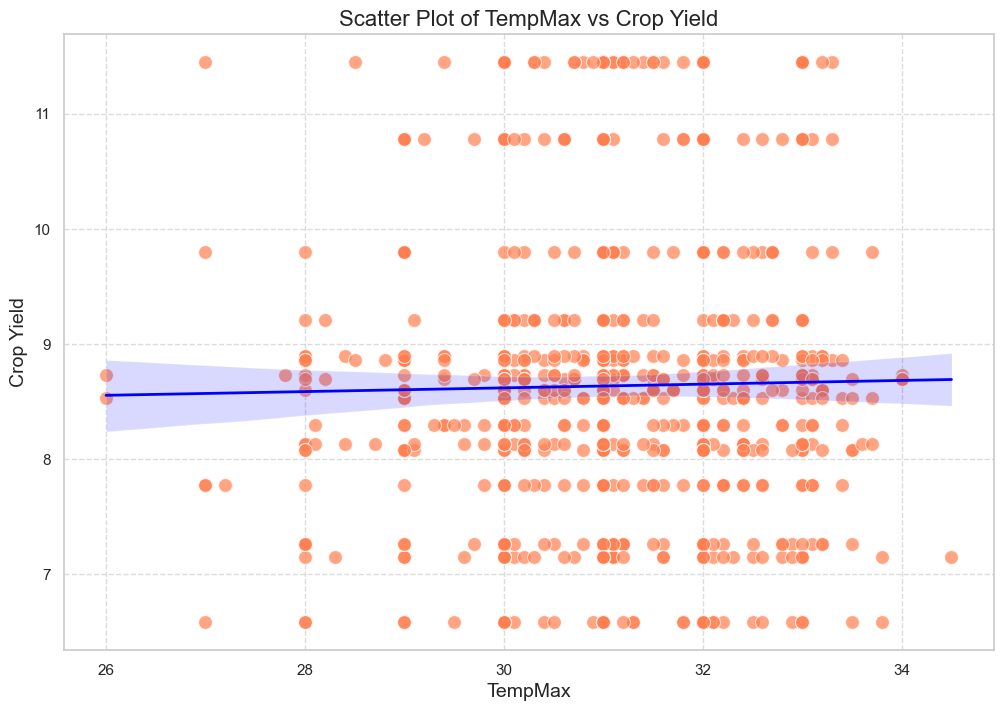

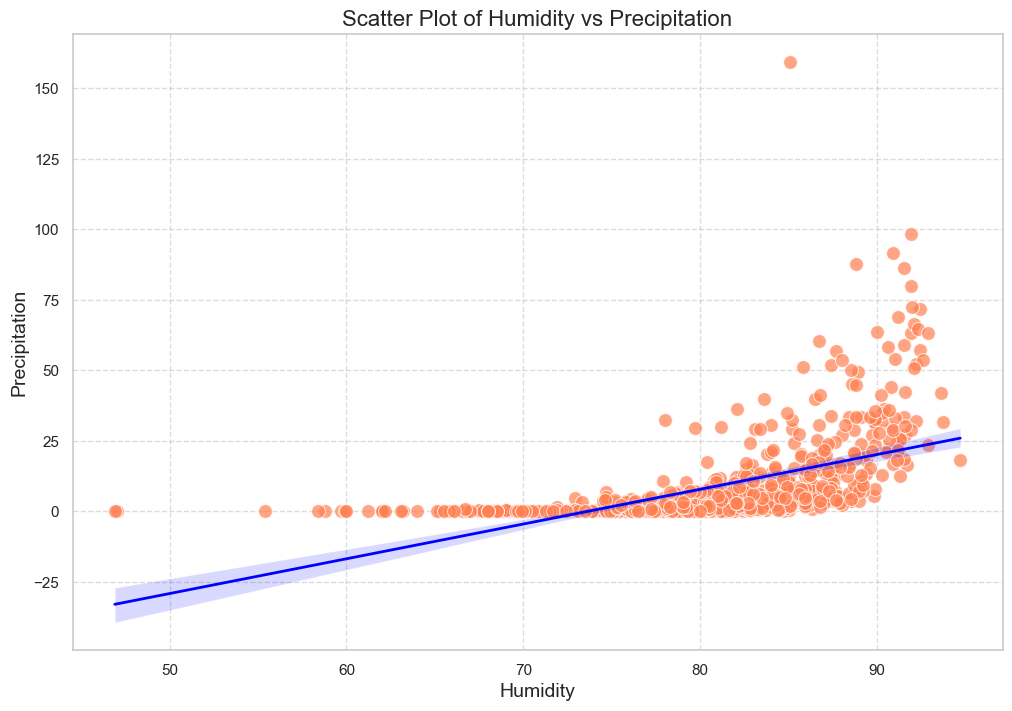

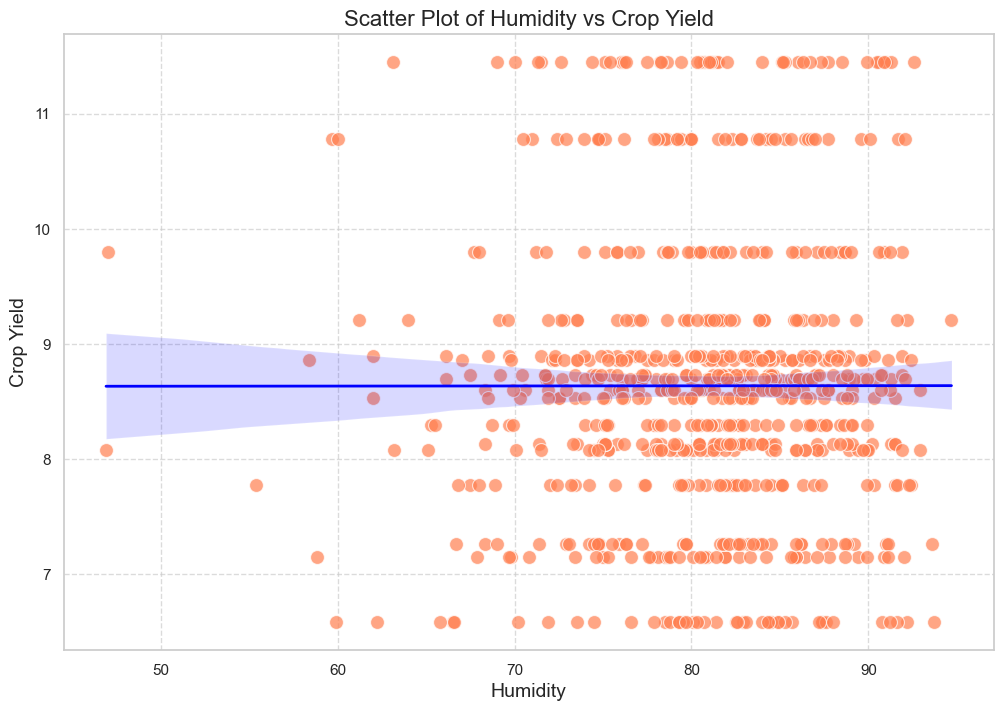

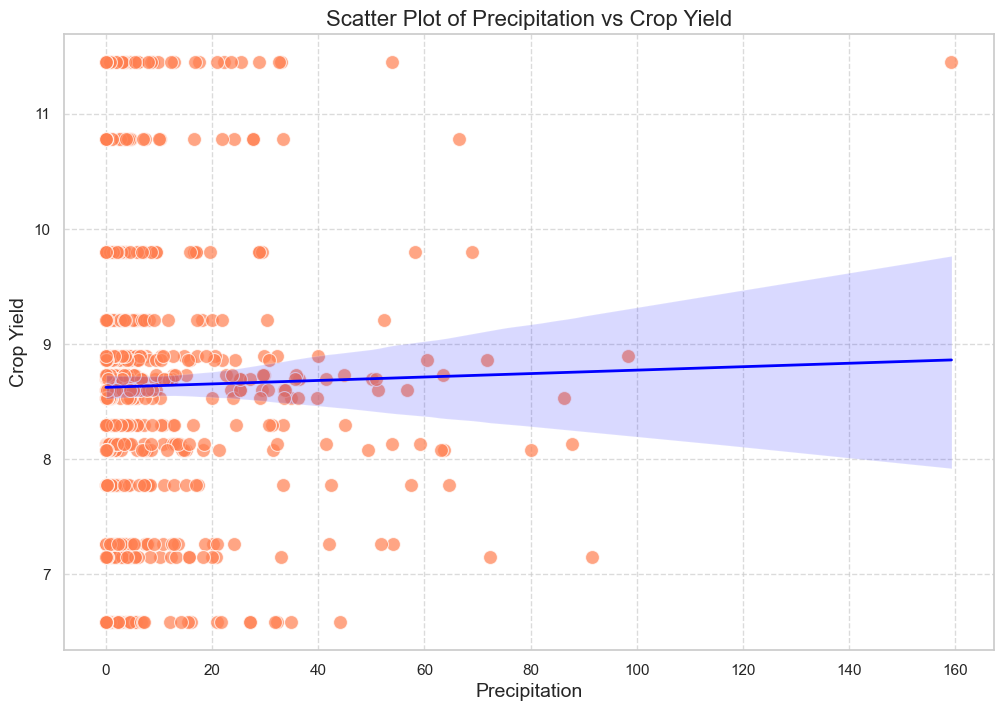

In [36]:
# Define a subset of numerical columns for visualization
selected_numerical_columns = ['TempMax', 'Humidity', 'Precipitation', 'Crop Yield']
def scatter_plots(data, numerical_columns):
    num_cols = len(numerical_columns)
    
    # Set the theme for better aesthetics
    sns.set_theme(style="whitegrid")
    
    for i in range(num_cols):
        for j in range(i + 1, num_cols):
            plt.figure(figsize=(12, 8))
            
            # Create scatter plot with improved aesthetics
            sns.scatterplot(
                x=data[numerical_columns[i]], 
                y=data[numerical_columns[j]], 
                color="coral", 
                edgecolor="w", 
                s=100, 
                alpha=0.7
            )
            
            # Add trend line for better visualization
            sns.regplot(
                x=data[numerical_columns[i]], 
                y=data[numerical_columns[j]], 
                scatter=False, 
                color="blue", 
                line_kws={'linewidth':2}
            )
            
            # Add titles and labels
            plt.title(f'Scatter Plot of {numerical_columns[i]} vs {numerical_columns[j]}', fontsize=16)
            plt.xlabel(numerical_columns[i], fontsize=14)
            plt.ylabel(numerical_columns[j], fontsize=14)
            
            # Add grid lines
            plt.grid(True, linestyle='--', alpha=0.7)
            
            # Show plot
            plt.show()

# Generate scatter plots for selected numerical columns
scatter_plots(data, selected_numerical_columns)

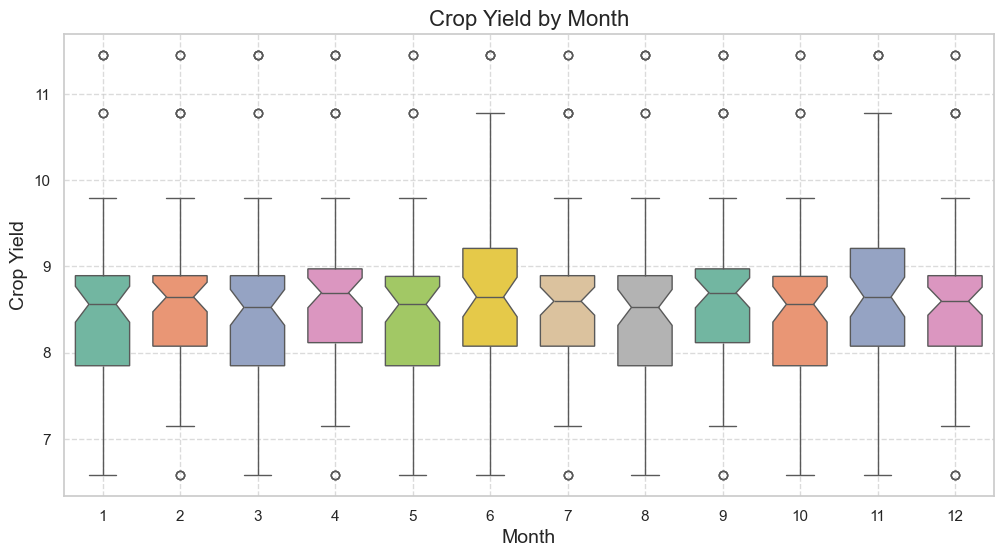

In [37]:
sns.set_theme(style="whitegrid")

# Create the box plot with improved aesthetics
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Month', 
    y='Crop Yield', 
    data=data, 
    palette="Set2",       # Use a color palette for distinct month colors
    width=0.7,            # Adjust the width of the box plots
    fliersize=6,          # Set size of outliers
    notch=True,           # Add notches to show confidence intervals
    hue='Month',          # Set hue to the Month column for color coding
    legend=False          # Turn off the legend to avoid redundancy
)

# Add titles and labels
plt.title('Crop Yield by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Crop Yield', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

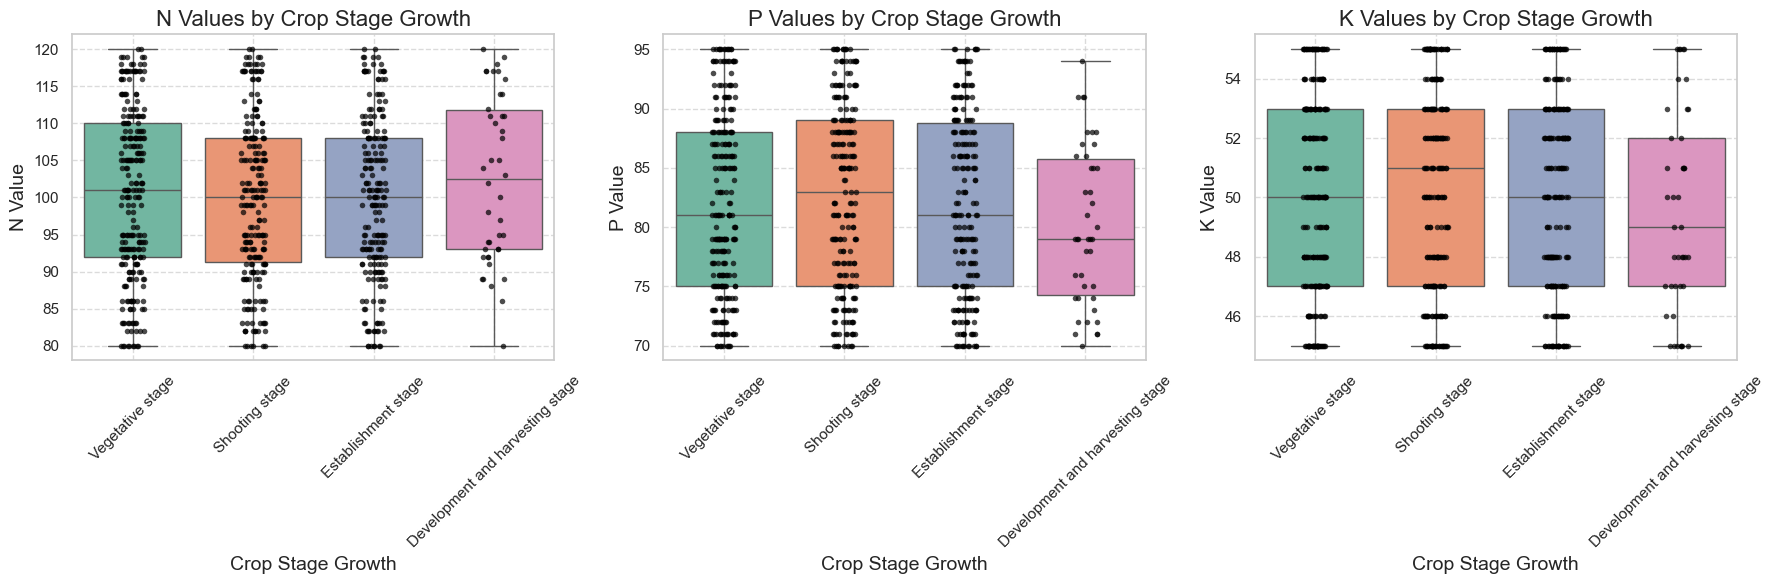

In [38]:
# Set theme for better aesthetics
sns.set_theme(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(18, 6))

# Box plot with strip plot for N values
plt.subplot(1, 3, 1)
sns.boxplot(
    x='Crop stage growth', 
    y='N', 
    data=data, 
    showfliers=False, 
    hue='Crop stage growth',  # Use hue for color coding
    palette="Set2",
    legend=False              # Disable legend as it's redundant here
)
sns.stripplot(
    x='Crop stage growth', 
    y='N', 
    data=data, 
    color='black', 
    alpha=0.7, 
    size=4, 
    jitter=True
)
plt.title('N Values by Crop Stage Growth', fontsize=16)
plt.xlabel('Crop Stage Growth', fontsize=14)
plt.ylabel('N Value', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Box plot with strip plot for P values
plt.subplot(1, 3, 2)
sns.boxplot(
    x='Crop stage growth', 
    y='P', 
    data=data, 
    showfliers=False, 
    hue='Crop stage growth',  # Use hue for color coding
    palette="Set2",
    legend=False              # Disable legend as it's redundant here
)
sns.stripplot(
    x='Crop stage growth', 
    y='P', 
    data=data, 
    color='black', 
    alpha=0.7, 
    size=4, 
    jitter=True
)
plt.title('P Values by Crop Stage Growth', fontsize=16)
plt.xlabel('Crop Stage Growth', fontsize=14)
plt.ylabel('P Value', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Box plot with strip plot for K values
plt.subplot(1, 3, 3)
sns.boxplot(
    x='Crop stage growth', 
    y='K', 
    data=data, 
    showfliers=False, 
    hue='Crop stage growth',  # Use hue for color coding
    palette="Set2",
    legend=False              # Disable legend as it's redundant here
)
sns.stripplot(
    x='Crop stage growth', 
    y='K', 
    data=data, 
    color='black', 
    alpha=0.7, 
    size=4, 
    jitter=True
)
plt.title('K Values by Crop Stage Growth', fontsize=16)
plt.xlabel('Crop Stage Growth', fontsize=14)
plt.ylabel('K Value', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

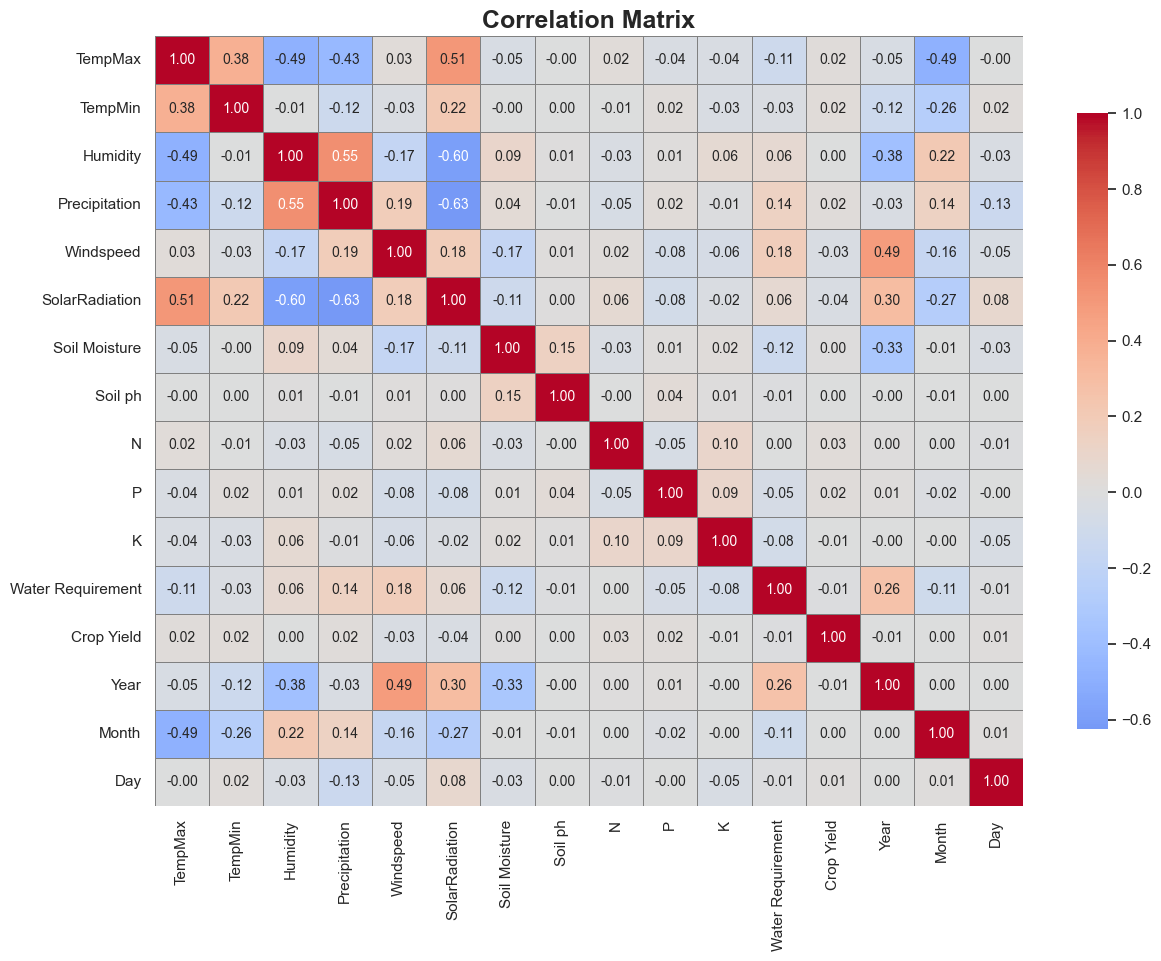

In [39]:
# Select only numeric columns for correlation matrix
numeric_columns = data.select_dtypes(include=['number'])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))

# Create a heatmap with improved aesthetics
sns.heatmap(
    correlation_matrix, 
    annot=True,                # Display correlation coefficients
    cmap='coolwarm',           # Color map for the heatmap
    center=0,                  # Center the color map at zero
    fmt=".2f",                 # Format annotation text to 2 decimal places
    linewidths=0.5,            # Add lines between cells
    linecolor='gray',          # Color of the lines
    annot_kws={"size": 10},    # Font size for annotations
    cbar_kws={"shrink": 0.8}   # Shrink color bar to fit the plot
)

# Add titles and labels
plt.title('Correlation Matrix', fontsize=18, weight='bold')

# Show the plot
plt.show()

In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import pickle

In [42]:
# Define feature columns and target column
feature_columns = [
    'TempMax', 'TempMin', 'Humidity', 'Precipitation', 'Windspeed',
    'SolarRadiation', 'Soil Moisture', 'Soil ph', 'N', 'P', 'K', 'Water Requirement',
    'Year', 'Month', 'Day', 'State', 'District Name', 'Market Name', 'Commodity',
    'Variety', 'Soil type'
]
target_column = 'Crop stage growth'

In [43]:

# Check if all columns are present
missing_features = [col for col in feature_columns if col not in data.columns]
if missing_features:
    print(f"Warning: The following features are missing from the dataset: {missing_features}")
    raise KeyError("Missing features in dataset.")
if target_column not in data.columns:
    raise KeyError(f"Target column '{target_column}' not found in the dataset.")

In [44]:
# Encode categorical features
categorical_features = ['State', 'District Name', 'Market Name', 'Commodity', 'Variety', 'Soil type']
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


In [45]:
# Define features and target
X = data[feature_columns]
y = LabelEncoder().fit_transform(data[target_column])

In [46]:
# Ensure all data is numeric
print("Feature Data Types:\n", X.dtypes)
print("Target Data Type:\n", pd.Series(y).dtype)

Feature Data Types:
 TempMax              float64
TempMin              float64
Humidity             float64
Precipitation        float64
Windspeed            float64
SolarRadiation       float64
Soil Moisture        float64
Soil ph              float64
N                      int64
P                      int64
K                      int64
Water Requirement    float64
Year                   int32
Month                  int32
Day                    int32
State                  int32
District Name          int32
Market Name            int32
Commodity              int32
Variety                int32
Soil type              int32
dtype: object
Target Data Type:
 int32


In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [49]:
# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}


In [50]:
# Initialize and fit GridSearchCV
xgb_model = XGBClassifier(random_state=42, eval_metric='mlogloss')
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 150],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy', verbose=2)

In [51]:

# Display the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}
Best accuracy:  0.9554850647634153


In [52]:
# Initialize and train the model with the best parameters
best_xgb_model = XGBClassifier(random_state=42, eval_metric='mlogloss', **grid_search.best_params_)
best_xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [53]:
# Evaluate the model
y_pred = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Test set accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Test set accuracy: 0.9726
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.94      0.97        35
           2       0.98      0.98      0.98        46
           3       0.95      0.98      0.97        57

    accuracy                           0.97       146
   macro avg       0.98      0.98      0.98       146
weighted avg       0.97      0.97      0.97       146



In [54]:
# Save the trained model
import pickle
with open('xgb_model.pkl', 'wb') as model_file:
    pickle.dump(best_xgb_model, model_file)

In [55]:
# Load the saved model
with open('xgb_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [56]:
# Check if the model is loaded
if loaded_model is not None:
    print("Model loaded successfully.")
    
    # Test the loaded model
    # Using a small random sample from the test set (if available)
    sample_data = X_test.sample(n=1)  # Get a single sample from the test set
    sample_prediction = loaded_model.predict(sample_data)
    
    print(f"Sample data:\n{sample_data}")
    print(f"Prediction for sample data: {sample_prediction}")
else:
    print("Failed to load the model.")

Model loaded successfully.
Sample data:
    TempMax  TempMin  Humidity  Precipitation  Windspeed  SolarRadiation  \
30     32.0     25.6      80.0            0.0       14.0           239.2   

    Soil Moisture   Soil ph   N   P  ...  Water Requirement  Year  Month  Day  \
30          156.1  6.101242  93  91  ...               11.8  2021      1   31   

    State  District Name  Market Name  Commodity  Variety  Soil type  
30      0              0            0          0        0          0  

[1 rows x 21 columns]
Prediction for sample data: [3]
